In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Data Pre-Processing

In [107]:
df = pd.read_csv("/content/combined_financial_data_idx.csv", delimiter=",")
df.head()

,symbol,account,type,2020,2021,2022,2023
0,AALI,Accounts Payable,BS,7.702640e+11,1.026717e+12,1.224423e+12,8.420640e+11
1,AALI,Accounts Receivable,BS,7.658490e+11,4.581350e+11,8.487700e+11,6.744870e+11
2,AALI,Accumulated Depreciation,BS,-1.092095e+13,-1.213381e+13,-1.330375e+13,-1.443685e+13
3,AALI,Additional Paid In Capital,BS,3.878995e+12,3.878995e+12,3.878995e+12,3.878995e+12
4,AALI,Allowance For Doubtful Accounts Receivable,BS,-2.426100e+10,-2.454300e+10,-2.705700e+10,-2.651600e+10


In [108]:
dfn = df.drop(columns=["symbol", "type"])

In [148]:
len(df.account.unique()) * 4

1056

In [110]:
pivot_df = df.pivot(index="symbol", columns="account", values="2020")
pivot_df1 = df.pivot(index="symbol", columns="account", values="2021")
pivot_df2 = df.pivot(index="symbol", columns="account", values="2022")
pivot_df3 = df.pivot(index="symbol", columns="account", values="2023")

In [111]:
pivot_df

account,Accounts Payable,Accounts Receivable,Accumulated Depreciation,Additional Paid In Capital,Allowance For Doubtful Accounts Receivable,Amortization,Assets Held For Sale Current,Available For Sale Securities,Basic Average Shares,Basic EPS,...,Total Tax Payable,Total Unusual Items,Total Unusual Items Excluding Goodwill,Tradeand Other Payables Non Current,Trading Securities,Treasury Shares Number,Treasury Stock,Work In Process,Working Capital,Write Off
symbol,,,,,,,,,,,,,,,,,,,,,
AALI,7.702640e+11,7.658490e+11,-1.092095e+13,3.878995e+12,-2.426100e+10,NaN,NaN,NaN,1.924688e+09,432.840000,...,2.226190e+11,-3.758730e+11,-3.758730e+11,NaN,NaN,NaN,NaN,1.102880e+11,4.145384e+12,-3.440000e+10
ABBA,3.835642e+10,1.589415e+10,-1.764548e+11,-1.012454e+11,-6.841390e+10,NaN,NaN,8.225640e+10,3.467581e+09,-12.950970,...,1.886619e+10,-1.859685e+09,-1.859685e+09,7.175289e+10,NaN,NaN,NaN,NaN,-7.828119e+10,1.899385e+09
ABDA,7.686395e+09,8.013687e+10,-9.088003e+10,8.109426e+09,NaN,NaN,NaN,NaN,6.208067e+08,223.000000,...,2.825653e+10,7.536500e+08,7.536500e+08,NaN,0.0,NaN,NaN,NaN,NaN,NaN
ABMM,1.156274e+08,1.386149e+08,-6.859381e+08,1.150872e+08,-5.242683e+07,NaN,0.0,2.002887e+07,2.753165e+09,-0.012950,...,8.121803e+06,-2.402320e+07,-2.402320e+07,3.359881e+06,NaN,NaN,NaN,3.793743e+06,5.146913e+07,NaN
ACES,1.642272e+11,1.434827e+11,-8.396180e+11,4.405749e+11,-5.511007e+07,3.706185e+09,NaN,NaN,1.710694e+10,42.860000,...,1.285074e+11,-7.628889e+07,-7.628889e+07,NaN,NaN,29610300.0,3.418487e+10,NaN,4.189809e+12,1.589815e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WTON,2.597365e+12,9.165796e+11,-1.475561e+12,9.886334e+11,-1.929934e+11,NaN,NaN,9.153000e+09,8.715467e+09,14.690000,...,5.061764e+10,5.104698e+10,5.104698e+10,7.474401e+09,NaN,NaN,0.000000e+00,NaN,5.415877e+11,-6.331298e+10
YPAS,8.992000e+09,8.413440e+10,-1.597064e+11,2.805402e+10,-1.252573e+09,NaN,NaN,NaN,6.680001e+08,12.000000,...,1.472757e+08,6.466937e+06,6.466937e+06,5.000000e+10,NaN,NaN,NaN,1.968648e+10,6.853510e+10,NaN
YULE,1.378826e+10,2.875726e+10,-3.335576e+09,-1.804183e+08,NaN,NaN,NaN,NaN,1.498816e+09,-4.820000,...,2.547624e+08,0.000000e+00,0.000000e+00,NaN,NaN,NaN,5.535904e+10,NaN,3.436256e+11,NaN


In [112]:
dfn = pd.DataFrame(columns=df.account.unique())

In [113]:
df_merged = pd.concat([pivot_df ,pivot_df1 ,pivot_df2 ,pivot_df3], ignore_index=True)

In [114]:
df_merged

account,Accounts Payable,Accounts Receivable,Accumulated Depreciation,Additional Paid In Capital,Allowance For Doubtful Accounts Receivable,Amortization,Assets Held For Sale Current,Available For Sale Securities,Basic Average Shares,Basic EPS,...,Total Tax Payable,Total Unusual Items,Total Unusual Items Excluding Goodwill,Tradeand Other Payables Non Current,Trading Securities,Treasury Shares Number,Treasury Stock,Work In Process,Working Capital,Write Off
0,7.702640e+11,7.658490e+11,-1.092095e+13,3.878995e+12,-2.426100e+10,NaN,NaN,NaN,1.924688e+09,432.84000,...,2.226190e+11,-3.758730e+11,-3.758730e+11,NaN,NaN,NaN,NaN,1.102880e+11,4.145384e+12,-3.440000e+10
1,3.835642e+10,1.589415e+10,-1.764548e+11,-1.012454e+11,-6.841390e+10,NaN,NaN,8.225640e+10,3.467581e+09,-12.95097,...,1.886619e+10,-1.859685e+09,-1.859685e+09,7.175289e+10,NaN,NaN,NaN,NaN,-7.828119e+10,1.899385e+09
2,7.686395e+09,8.013687e+10,-9.088003e+10,8.109426e+09,NaN,NaN,NaN,NaN,6.208067e+08,223.00000,...,2.825653e+10,7.536500e+08,7.536500e+08,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1.156274e+08,1.386149e+08,-6.859381e+08,1.150872e+08,-5.242683e+07,NaN,0.0,2.002887e+07,2.753165e+09,-0.01295,...,8.121803e+06,-2.402320e+07,-2.402320e+07,3.359881e+06,NaN,NaN,NaN,3.793743e+06,5.146913e+07,NaN
4,1.642272e+11,1.434827e+11,-8.396180e+11,4.405749e+11,-5.511007e+07,3.706185e+09,NaN,NaN,1.710694e+10,42.86000,...,1.285074e+11,-7.628889e+07,-7.628889e+07,NaN,NaN,29610300.0,3.418487e+10,NaN,4.189809e+12,1.589815e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2.059175e+12,1.133944e+12,-2.058978e+12,9.874133e+11,-1.297400e+11,NaN,NaN,NaN,8.715467e+09,3.92000,...,1.302712e+11,-2.823655e+10,-2.823655e+10,8.168071e+09,NaN,NaN,NaN,NaN,6.572155e+11,2.823655e+10
2412,1.248537e+10,9.126920e+10,-1.777039e+11,2.805402e+10,-1.493604e+09,NaN,NaN,NaN,NaN,NaN,...,3.637880e+07,6.049009e+08,6.049009e+08,5.000000e+10,NaN,NaN,NaN,2.606021e+10,6.744816e+10,NaN
2413,3.483963e+10,3.722868e+10,-6.542165e+09,-1.804183e+08,NaN,NaN,NaN,NaN,NaN,NaN,...,4.612489e+08,NaN,NaN,NaN,NaN,207313200.0,4.010236e+10,NaN,5.015400e+11,NaN
2414,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
df_merged = df_merged[df_merged["Free Cash Flow"]!=0]

In [116]:
new_df = df_merged.copy()

In [117]:
nlist = [
    "Capital Expenditure",
    "EBITDA",
    "Total Debt",
    "Total Revenue",
    "Working Capital",
    "Accounts Receivable",
    "Accounts Payable",
    "Cash And Cash Equivalents",
]

In [118]:
for a in nlist + ["Free Cash Flow"]:
  noise = np.random.normal(0, 0.03, len(df_merged))
  new_df[a] = new_df[a] + noise

new2_df = new_df.copy()
for a in nlist + ["Free Cash Flow"]:
  noise = np.random.normal(0, 0.03, len(df_merged))
  new2_df[a] = new2_df[a] + noise


new3_df = new_df.copy()
for a in nlist + ["Free Cash Flow"]:
  noise = np.random.normal(0, 0.03, len(df_merged))
  new3_df[a] = new3_df[a] + noise

In [119]:
new_df = pd.concat([df_merged, new_df ,new2_df, new3_df])

In [149]:
len(new_df)

9664

In [120]:
new_df.head()

account,Accounts Payable,Accounts Receivable,Accumulated Depreciation,Additional Paid In Capital,Allowance For Doubtful Accounts Receivable,Amortization,Assets Held For Sale Current,Available For Sale Securities,Basic Average Shares,Basic EPS,...,Total Tax Payable,Total Unusual Items,Total Unusual Items Excluding Goodwill,Tradeand Other Payables Non Current,Trading Securities,Treasury Shares Number,Treasury Stock,Work In Process,Working Capital,Write Off
0,7.702640e+11,7.658490e+11,-1.092095e+13,3.878995e+12,-2.426100e+10,NaN,NaN,NaN,1.924688e+09,432.84000,...,2.226190e+11,-3.758730e+11,-3.758730e+11,NaN,NaN,NaN,NaN,1.102880e+11,4.145384e+12,-3.440000e+10
1,3.835642e+10,1.589415e+10,-1.764548e+11,-1.012454e+11,-6.841390e+10,NaN,NaN,8.225640e+10,3.467581e+09,-12.95097,...,1.886619e+10,-1.859685e+09,-1.859685e+09,7.175289e+10,NaN,NaN,NaN,NaN,-7.828119e+10,1.899385e+09
2,7.686395e+09,8.013687e+10,-9.088003e+10,8.109426e+09,NaN,NaN,NaN,NaN,6.208067e+08,223.00000,...,2.825653e+10,7.536500e+08,7.536500e+08,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,1.156274e+08,1.386149e+08,-6.859381e+08,1.150872e+08,-5.242683e+07,NaN,0.0,2.002887e+07,2.753165e+09,-0.01295,...,8.121803e+06,-2.402320e+07,-2.402320e+07,3.359881e+06,NaN,NaN,NaN,3.793743e+06,5.146913e+07,NaN
4,1.642272e+11,1.434827e+11,-8.396180e+11,4.405749e+11,-5.511007e+07,3.706185e+09,NaN,NaN,1.710694e+10,42.86000,...,1.285074e+11,-7.628889e+07,-7.628889e+07,NaN,NaN,29610300.0,3.418487e+10,NaN,4.189809e+12,1.589815e+08


In [121]:
final_dataset = new_df[nlist]
targets = new_df["Free Cash Flow"]

In [122]:
final_dataset.columns

Index(['Capital Expenditure', 'EBITDA', 'Total Debt', 'Total Revenue',
       'Working Capital', 'Accounts Receivable', 'Accounts Payable',
       'Cash And Cash Equivalents'],
      dtype='object', name='account')

In [123]:
final_dataset.head()

account,Capital Expenditure,EBITDA,Total Debt,Total Revenue,Working Capital,Accounts Receivable,Accounts Payable,Cash And Cash Equivalents
0,-9.991980e+11,2.006798e+12,5.623933e+12,1.880704e+13,4.145384e+12,7.658490e+11,7.702640e+11,9.788920e+11
1,-9.519321e+08,-3.437304e+10,1.043898e+11,1.586079e+11,-7.828119e+10,1.589415e+10,3.835642e+10,2.672453e+10
2,-4.966673e+09,NaN,NaN,9.071943e+11,NaN,8.013687e+10,7.686395e+09,6.520837e+11
3,-7.114501e+07,2.270477e+07,4.254016e+08,6.064074e+08,5.146913e+07,1.386149e+08,1.156274e+08,1.092124e+08
4,-1.629966e+11,1.457806e+12,8.332278e+11,7.412767e+12,4.189809e+12,1.434827e+11,1.642272e+11,2.219785e+12


In [124]:
final_dataset = final_dataset.fillna(0)

In [125]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(final_dataset)

X_scaled = pd.DataFrame(X_scaled, columns=final_dataset.columns)

print(X_scaled.head())

account  Capital Expenditure    EBITDA    Total Debt  Total Revenue  \
0                   0.973890  0.535151  3.753063e-02       0.091004   
1                   0.999975  0.522961  6.966325e-04       0.034074   
2                   0.999870  0.523166  6.210494e-16       0.036360   
3                   0.999998  0.523166  2.838866e-06       0.033592   
4                   0.995741  0.531872  5.560444e-03       0.056220   

account  Working Capital  Accounts Receivable  Accounts Payable  \
0               0.316213             0.026027          0.019005   
1               0.265074             0.000540          0.000946   
2               0.266022             0.002723          0.000190   
3               0.266022             0.000005          0.000003   
4               0.316751             0.004876          0.004052   

account  Cash And Cash Equivalents  
0                     3.523113e-03  
1                     9.618377e-05  
2                     2.346903e-03  
3                     

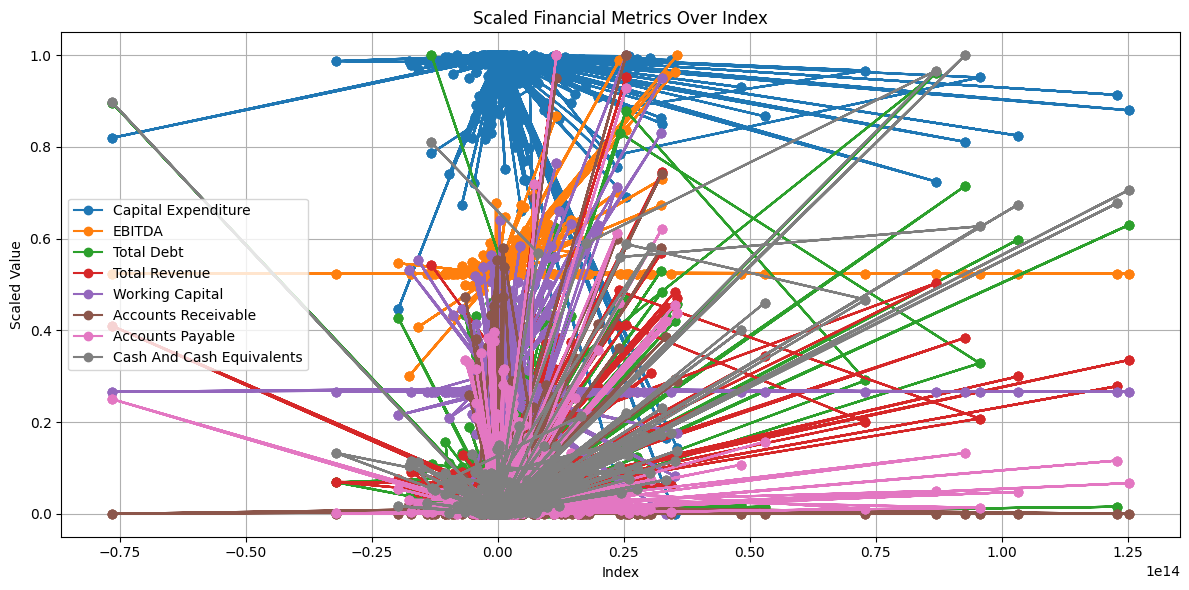

In [126]:
plt.figure(figsize=(12, 6))

# Plot each numeric column
for col in X_scaled.columns:
    plt.plot(targets, X_scaled[col], marker='o', label=col)

plt.title('Scaled Financial Metrics Over Index')
plt.xlabel('Index')
plt.ylabel('Scaled Value')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()

plt.show()

In [127]:
X_scaled

account,Capital Expenditure,EBITDA,Total Debt,Total Revenue,Working Capital,Accounts Receivable,Accounts Payable,Cash And Cash Equivalents
0,0.973890,0.535151,3.753063e-02,0.091004,0.316213,2.602715e-02,1.900526e-02,3.523113e-03
1,0.999975,0.522961,6.966325e-04,0.034074,0.265074,5.401580e-04,9.463945e-04,9.618377e-05
2,0.999870,0.523166,6.210494e-16,0.036360,0.266022,2.723428e-03,1.896517e-04,2.346903e-03
3,0.999998,0.523166,2.838866e-06,0.033592,0.266022,4.710785e-06,2.852954e-06,3.930644e-07
4,0.995741,0.531872,5.560444e-03,0.056220,0.316751,4.876216e-03,4.052092e-03,7.989188e-03
...,...,...,...,...,...,...,...,...
9659,0.997662,0.523827,2.563235e-03,0.046422,0.273979,3.853677e-02,5.080745e-02,1.465599e-03
9660,0.999878,0.523247,4.686116e-04,0.034648,0.266838,3.101757e-03,3.080602e-04,7.145902e-06
9661,0.999995,0.523319,8.331418e-06,0.033742,0.272094,1.265206e-03,8.596223e-04,1.692109e-04
9662,1.000000,0.523166,6.210494e-16,0.033590,0.266022,2.461011e-15,1.157635e-15,0.000000e+00


In [131]:
targets = targets.fillna(0)
targets.head()

,Free Cash Flow
0,1.322966e+12
1,-5.141506e+10
2,-2.270238e+11
3,6.120353e+07
4,1.375619e+12


# Data Splitting to Train and Test
#### We. used 10% of the dataset as a test while 90% of it is used for training.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, test_size=0.1, shuffle=True, random_state=4)

In [133]:
X_train.head()

account,Capital Expenditure,EBITDA,Total Debt,Total Revenue,Working Capital,Accounts Receivable,Accounts Payable,Cash And Cash Equivalents
5779,1.000000,0.523166,6.210494e-16,0.033590,0.266022,2.461011e-15,1.157635e-15,0.000000e+00
9540,0.999999,0.523460,7.716715e-04,0.034331,0.263424,5.103045e-04,1.157635e-15,2.444054e-05
2775,0.999746,0.526080,1.067726e-02,0.037504,0.290358,1.312153e-02,3.290712e-02,4.496609e-05
2875,1.000000,0.523166,4.308500e-08,0.033590,0.266022,1.131011e-07,1.864855e-08,1.131566e-09
7843,0.998953,0.523166,2.536194e-02,0.037677,0.266022,2.461011e-15,8.032273e-04,2.283690e-03


In [134]:
y_train.head()

,Free Cash Flow
947,0.000000e+00
2292,5.711614e+10
359,1.028782e+11
459,2.078081e+06
595,2.709264e+12


In [135]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

In [136]:
X_test

account,Capital Expenditure,EBITDA,Total Debt,Total Revenue,Working Capital,Accounts Receivable,Accounts Payable,Cash And Cash Equivalents
2275,1.000000,0.523166,1.581122e-07,0.033590,0.266022,3.516787e-07,2.132228e-07,6.700332e-08
7596,0.990344,0.535632,4.532593e-02,0.078916,0.275956,1.160816e-02,3.999751e-02,1.003461e-02
2632,0.980080,0.526739,3.513703e-02,0.057737,0.258141,4.579381e-02,1.323771e-02,3.682041e-04
4922,0.999277,0.524151,3.224044e-03,0.035208,0.269215,4.654837e-04,5.259535e-04,1.002095e-03
174,0.999946,0.522897,9.282255e-04,0.033807,0.265582,2.317189e-03,6.036333e-04,9.801777e-06
...,...,...,...,...,...,...,...,...
991,0.999744,0.525942,1.436974e-02,0.053907,0.261430,9.940867e-04,2.345987e-02,2.708623e-03
3912,0.999141,0.524807,5.357616e-03,0.035808,0.271605,2.238011e-03,2.281703e-03,3.670203e-03
7331,0.996811,0.523370,1.203294e-02,0.034330,0.295857,1.714480e-03,1.060846e-03,2.875824e-03
1131,1.000000,0.523243,6.037320e-06,0.033602,0.272143,1.257115e-05,1.157635e-15,1.568519e-03


# Basic Regression Models and Evaluation Metric
## In the following section, I have tried *LinearRegression*, *RandomForestRegressor*, *PolynomialRegression*, *RidgeRegression*

```
# This is formatted as code
```



In [137]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100
    print(f"{name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

evaluate_model("Linear Regression", y_test, lr_preds)

Linear Regression - MAE: 1120604756356.95, RMSE: 3469066827420.12, MAPE: 1728661929258237034496.00%


In [ ]:
evaluate_model("Linear Regression", y_test, lr_preds)

Linear Regression - MAE: 1423742050792.44, RMSE: 5495444385607.85, MAPE: 4407602308832540229632.00%


In [ ]:
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

evaluate_model("Random Forest", y_test, rf_preds)

Random Forest - MAE: 88028395729.29, RMSE: 481772739944.44, MAPE: 5492230161257046016.00%


In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train, y_train)
pf_preds = rf_model.predict(X_test)

In [ ]:
evaluate_model("Polynomial Forest", y_test, pf_preds)

Polynomial Forest - MAE: 88028395729.29, RMSE: 481772739944.44, MAPE: 5492230161257046016.00%


In [ ]:
ridge_regression = Ridge(alpha=1.0)
ridge_regression.fit(X_train, y_train)
ridge_preds = ridge_regression.predict(X_test)

In [ ]:
evaluate_model("Ridge Forest", y_test, ridge_preds)

Ridge Forest - MAE: 942466813965.12, RMSE: 3327554114433.81, MAPE: 83569727653020598272.00%


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [ ]:
evaluate_model("Ridge Forest", y_test, y_pred)

Ridge Forest - MAE: 942466813965.12, RMSE: 3327554114433.81, MAPE: 83569727653020598272.00%


# Neural Network For Regression
### In the following codes below I implemented a small neural network to show how we could implement the regression model to predict a Free Cash Flow of an organization.


In [138]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader, TensorDataset

In [139]:
model = nn.Sequential(nn.Linear(8,100, True), nn.Linear(100, 50, True), nn.Linear(50,1, True))

In [140]:
criterion = nn.MSELoss()

In [141]:
optimizer = Adam(model.parameters(), lr=0.01)

In [142]:
X_tensor = torch.from_numpy(X_train.to_numpy()).float()
y_tensor = torch.from_numpy(y_train.to_numpy()).float()

In [143]:
tdataset = TensorDataset(X_tensor, y_tensor)

In [144]:
loader = DataLoader(tdataset, batch_size=16, shuffle=True)

In [147]:
epochs = 40
for epoch in range(epochs):
    for batch_X, batch_Y in loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/40], Loss: 2160515235945367828692992.0000
Epoch [2/40], Loss: 20694848683900542124032.0000
Epoch [3/40], Loss: 2716722616177362835865600.0000
Epoch [4/40], Loss: 1296246797336859081965568.0000
Epoch [5/40], Loss: 25577221306131220004864.0000
Epoch [6/40], Loss: 216685994312920440242176.0000
Epoch [7/40], Loss: 22094993038252078792704.0000
Epoch [8/40], Loss: 342866317448713691201536.0000
Epoch [9/40], Loss: 2106555338995629721387008.0000
Epoch [10/40], Loss: 10836530582728639242043392.0000
Epoch [11/40], Loss: 4775365996206045817470976.0000
Epoch [12/40], Loss: 1055155346283255186849792.0000
Epoch [13/40], Loss: 519088640045613341212672.0000
Epoch [14/40], Loss: 26736247385989772159746048.0000
Epoch [15/40], Loss: 266655035460063437258752.0000
Epoch [16/40], Loss: 150906553263535796781056.0000
Epoch [17/40], Loss: 2614923394315468220137472.0000
Epoch [18/40], Loss: 21505347998039528177664.0000
Epoch [19/40], Loss: 1032592816553287267385344.0000
Epoch [20/40], Loss: 13597781045

In [ ]:
X_test = torch.from_numpy(X_test.to_numpy()).float()
y_test = torch.from_numpy(y_test.to_numpy()).float()
test_dataset = TensorDataset(X_test, y_test)

In [99]:
predictions = model(test_dataset.tensors[0])

In [ ]:
evaluate_model("Neural Network Regression", y_test, predictions.squeeze(1))